In [3]:
#%pylab inline
import seaborn; seaborn.set_style('whitegrid')
import itertools

from umap import UMAP
from sklearn.decomposition import PCA
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
#from apricot import FacilityLocationSelection

numpy.random.seed(0)

# %load_ext watermark
# %watermark -n -m -p numpy,matplotlib,seaborn

In [4]:
experiments = numpy.loadtxt("data/ENCODE_Tracks.txt", dtype=str, delimiter="\t")
celltypes = numpy.unique(experiments[:,0])
assays = numpy.unique(experiments[:,1])

experiments = numpy.array([(celltype, assay) for celltype, assay in itertools.product(celltypes, assays)])

rna_mask = numpy.array(['RNA' in assay or 'CAGE' in assay or 'RAMPAGE' in assay for assay in experiments[:,1]], dtype=bool)
tf_mask = numpy.array(['ChIP' in assay and assay[9]+assay[11] != 'HK' for assay in experiments[:,1]], dtype=bool)
his_mask = numpy.array(['ChIP' in assay and assay[9]+assay[11] == 'HK' for assay in experiments[:,1]], dtype=bool)
acc_mask = numpy.array(['ATAC' in assay or 'DNase' in assay for assay in experiments[:,1]], dtype=bool)

experiment_embedding = numpy.load("data/experiment_embedding4.npz")['arr_0']

In [5]:
X_pca = PCA(2).fit_transform(experiment_embedding)
X_umap = UMAP(200, random_state=111).fit_transform(experiment_embedding)

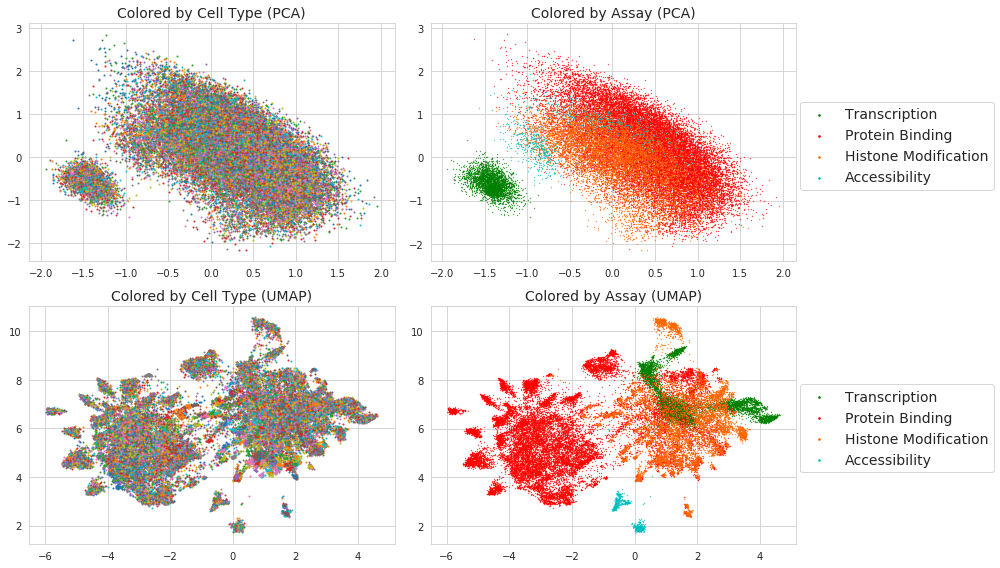

In [6]:
plt.figure(figsize=(14, 8), facecolor='w')

plt.subplot(221)
plt.title("Colored by Cell Type (PCA)", fontsize=14)
for celltype in celltypes:
    plt.scatter(*X_pca[experiments[:,0] == celltype].T, s=1)

plt.subplot(222)
plt.title("Colored by Assay (PCA)", fontsize=14)
plt.scatter(*X_pca[rna_mask].T, s=0.1, label='Transcription', color='g')
plt.scatter(*X_pca[tf_mask].T, s=0.1, label='Protein Binding', color='r')
plt.scatter(*X_pca[his_mask].T, s=0.1, label='Histone Modification', color='#FF6600')
plt.scatter(*X_pca[acc_mask].T, s=0.1, label='Accessibility', color='c')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)

plt.subplot(223)
plt.title("Colored by Cell Type (UMAP)", fontsize=14)
for celltype in celltypes:
    plt.scatter(*X_umap[experiments[:,0] == celltype].T, s=1)

plt.subplot(224)
plt.title("Colored by Assay (UMAP)", fontsize=14)
plt.scatter(*X_umap[rna_mask].T, s=0.1, label='Transcription', color='g')
plt.scatter(*X_umap[tf_mask].T, s=0.1, label='Protein Binding', color='r')
plt.scatter(*X_umap[his_mask].T, s=0.1, label='Histone Modification', color='#FF6600')
plt.scatter(*X_umap[acc_mask].T, s=0.1, label='Accessibility', color='c')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)
plt.tight_layout()
plt.show()

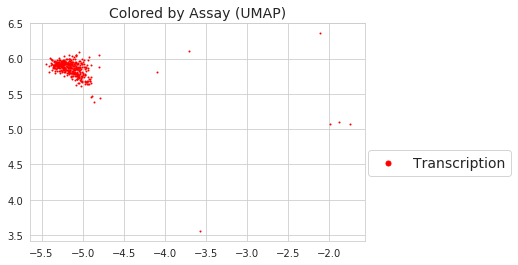

In [5]:
mask = experiments[:,1] == 'ChIP-seq_REST_signal_p-value'

plt.title("Colored by Assay (UMAP)", fontsize=14)
plt.scatter(*X_umap[mask].T, s=1, label='Transcription', color='r')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)

In [6]:
annotations = numpy.loadtxt("../../../mango/scripts/Biosample Names.txt", delimiter="\t", dtype=str)

brains = ['neur' in name or 'brain' in name for name in annotations[:,1]]
brains = numpy.array(brains)

mask = experiments[:,1] == 'ChIP-seq_REST_signal_p-value'
brain_mask = numpy.isin(experiments[:,0], annotations[brains, 0])

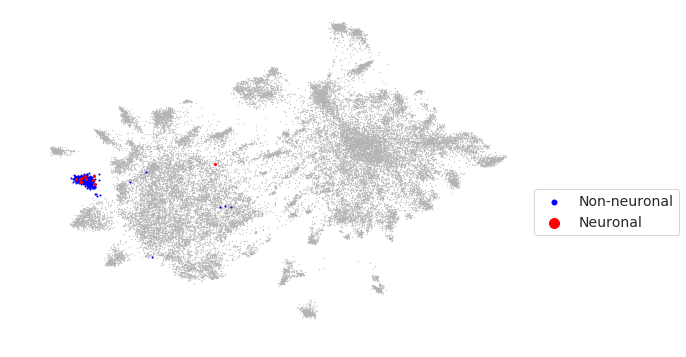

In [7]:
mask = experiments[:,1] == 'ChIP-seq_REST_signal_p-value'

plt.figure(figsize=(9, 6), facecolor='w')
plt.scatter(*X_umap.T, s=0.1, color='0.7')
plt.scatter(*X_umap[mask & ~brain_mask].T, s=1, label='Non-neuronal', color='b')
plt.scatter(*X_umap[mask & brain_mask].T, s=4, label='Neuronal', color='r')
plt.axis('off')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)

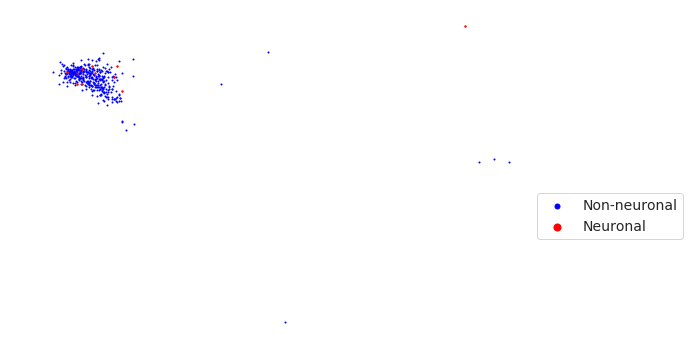

In [8]:
mask = experiments[:,1] == 'ChIP-seq_REST_signal_p-value'

plt.figure(figsize=(9, 6), facecolor='w')
#plt.scatter(*X_umap.T, s=0.1, color='0.7')
plt.scatter(*X_umap[mask & ~brain_mask].T, s=1, label='Non-neuronal', color='b')
plt.scatter(*X_umap[mask & brain_mask].T, s=2, label='Neuronal', color='r')
plt.axis('off')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)

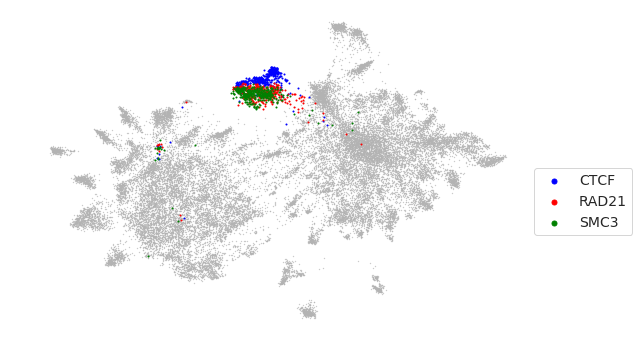

In [9]:
name1, name2, name3 = 'CTCF', 'RAD21', 'SMC3'

mask1 = experiments[:,1] == 'ChIP-seq_{}_signal_p-value'.format(name1)
mask2 = experiments[:,1] == 'ChIP-seq_{}_signal_p-value'.format(name2)
mask3 = experiments[:,1] == 'ChIP-seq_{}_signal_p-value'.format(name3)

plt.figure(figsize=(9, 6), facecolor='w')
plt.scatter(*X_umap.T, s=0.1, color='0.7')
plt.scatter(*X_umap[mask1].T, s=1, label=name1, color='b')
plt.scatter(*X_umap[mask2].T, s=1, label=name2, color='r')
plt.scatter(*X_umap[mask3].T, s=1, label=name3, color='g')
plt.axis('off')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)

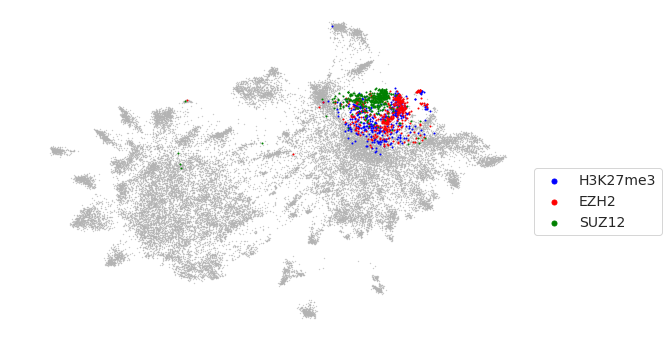

In [10]:
name1, name2, name3 = 'H3K27me3', 'EZH2', 'SUZ12'

mask1 = experiments[:,1] == 'ChIP-seq_{}_signal_p-value'.format(name1)
mask2 = experiments[:,1] == 'ChIP-seq_{}_signal_p-value'.format(name2)
mask3 = experiments[:,1] == 'ChIP-seq_{}_signal_p-value'.format(name3)

plt.figure(figsize=(9, 6), facecolor='w')
plt.scatter(*X_umap.T, s=0.1, color='0.7')
plt.scatter(*X_umap[mask1].T, s=1, label=name1, color='b')
plt.scatter(*X_umap[mask2].T, s=1, label=name2, color='r')
plt.scatter(*X_umap[mask3].T, s=1, label=name3, color='g')
plt.axis('off')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)

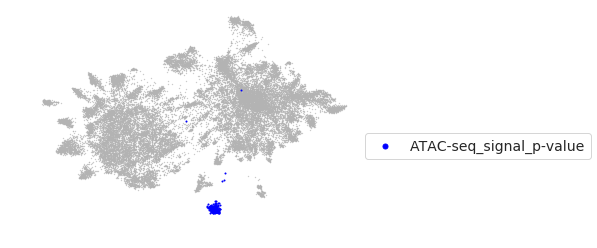

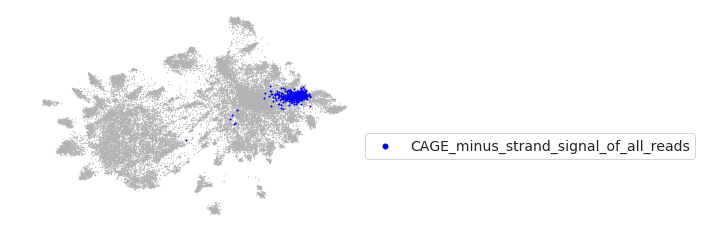

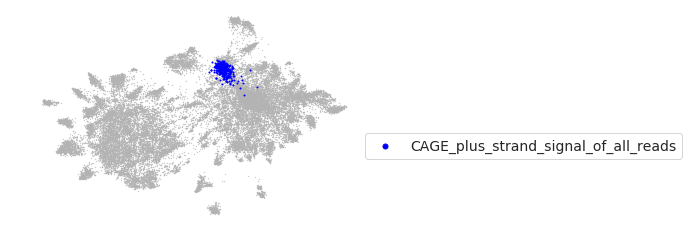

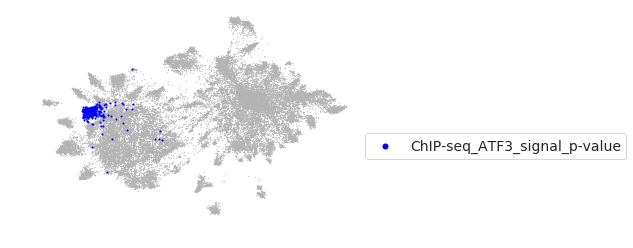

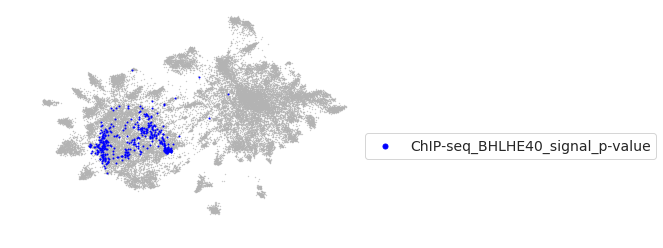

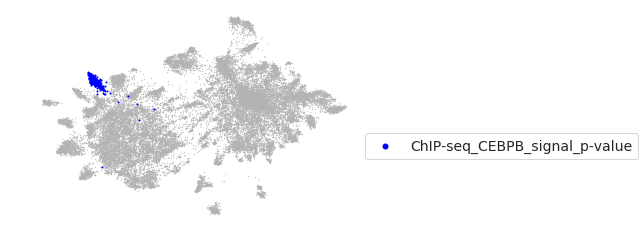

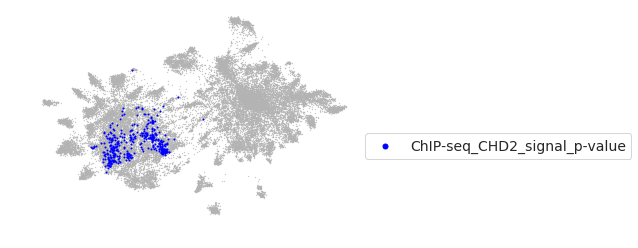

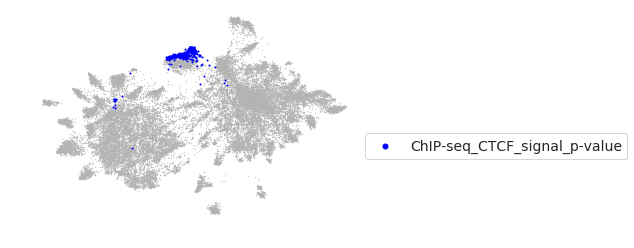

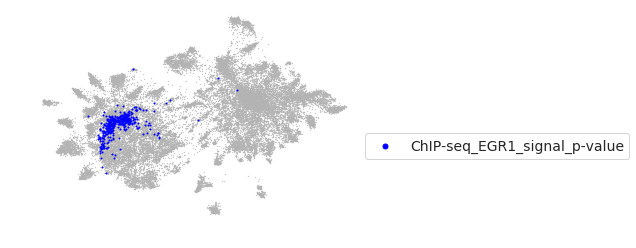

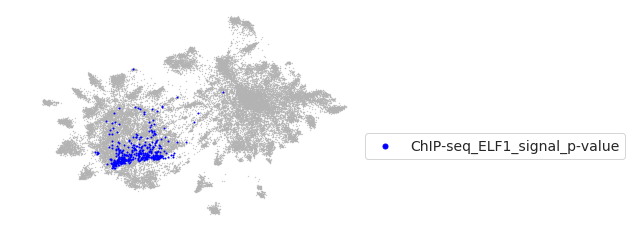

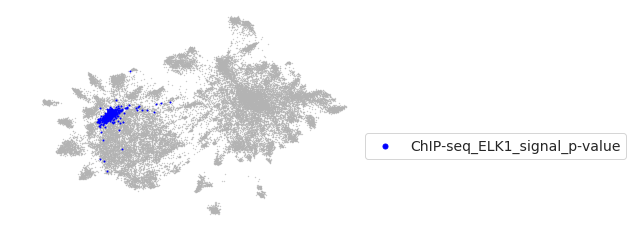

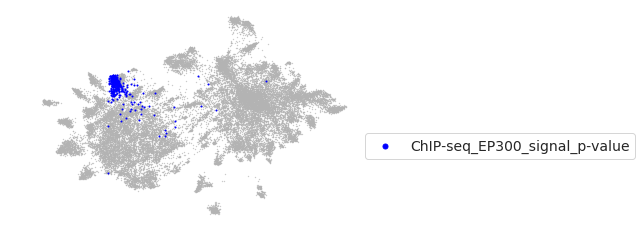

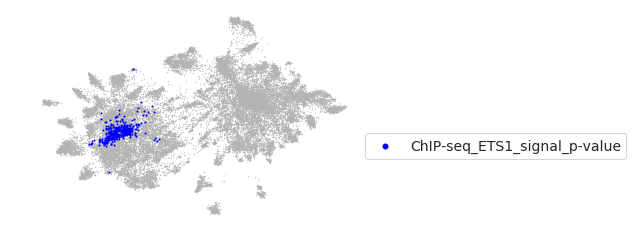

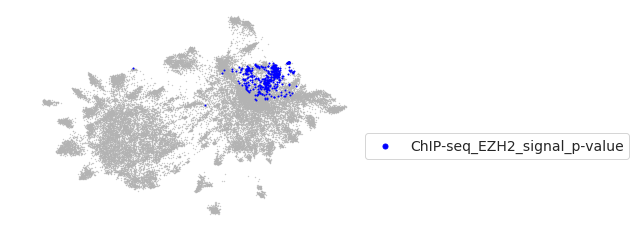

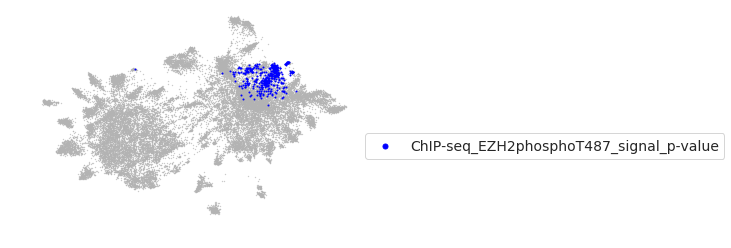

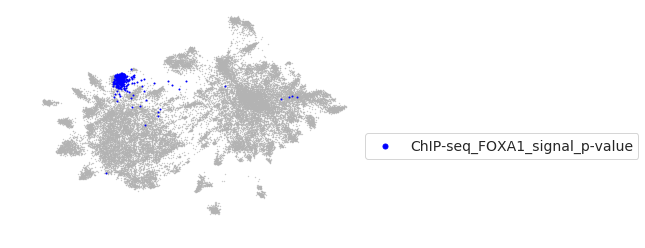

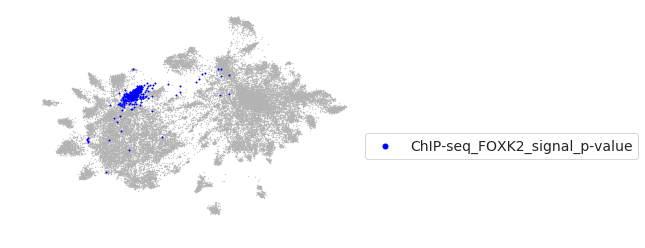

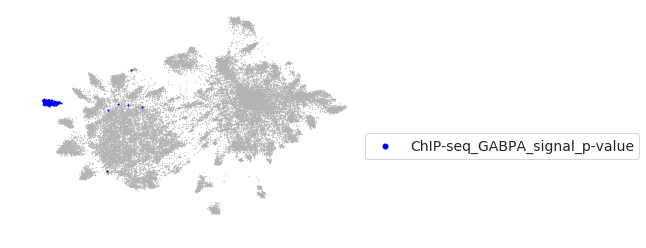

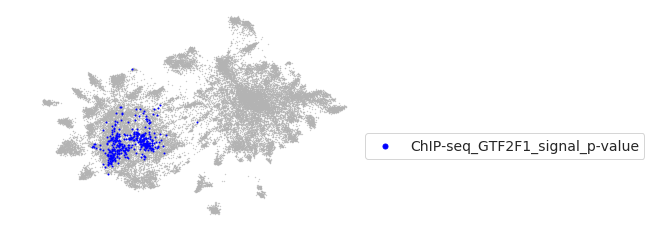

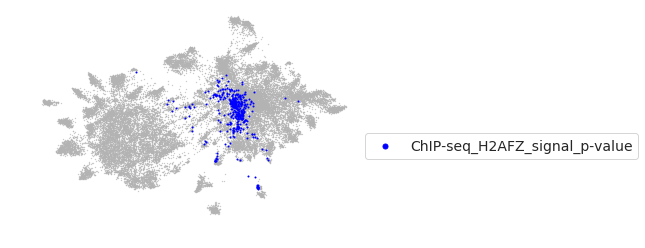

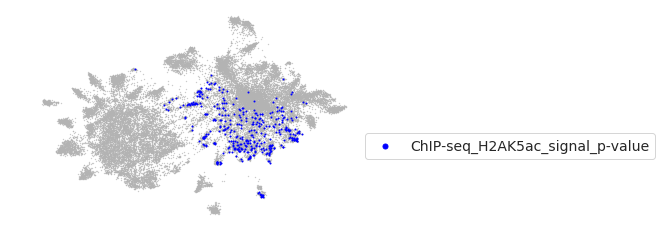

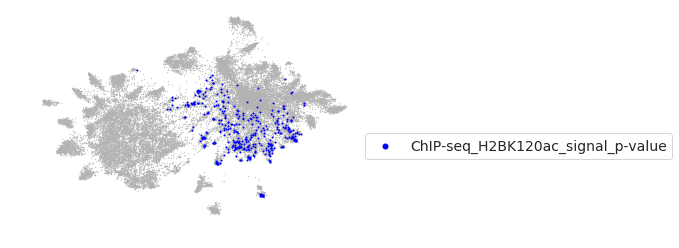

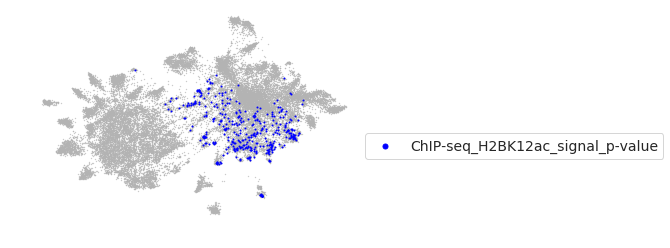

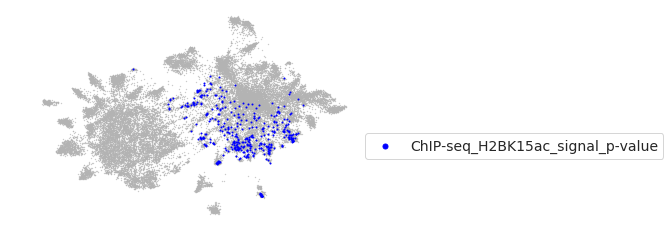

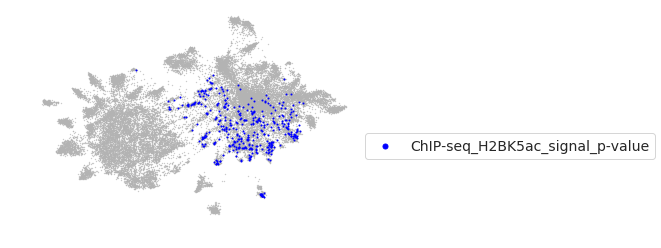

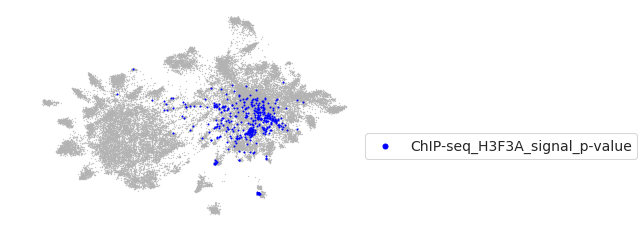

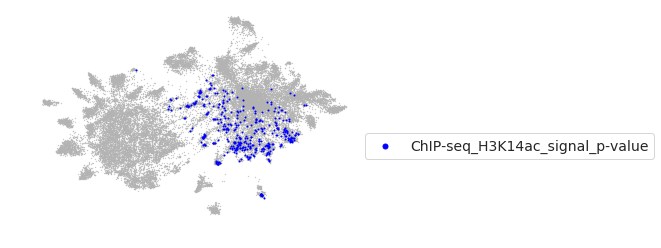

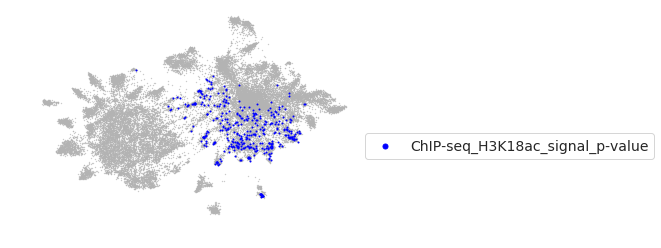

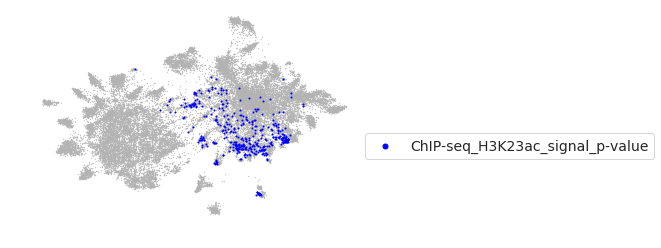

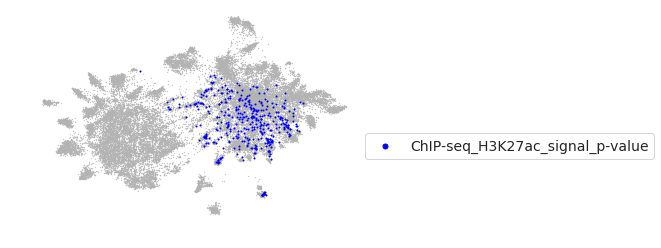

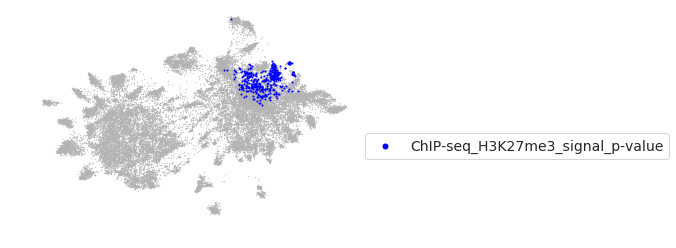

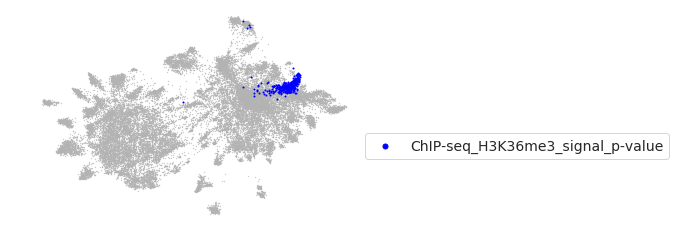

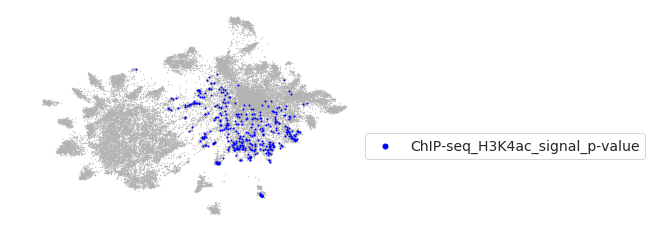

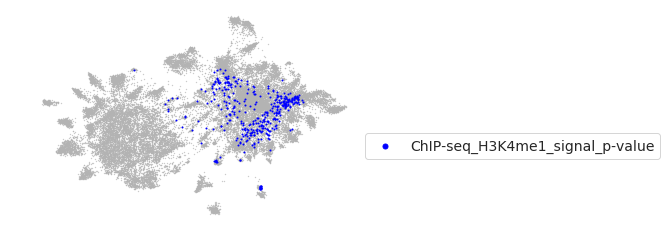

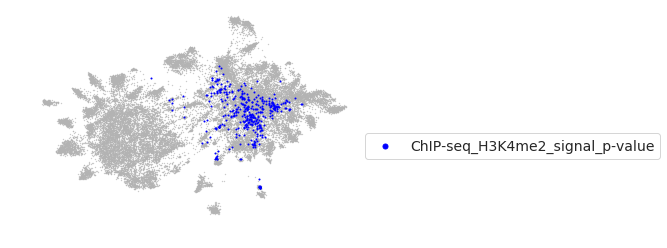

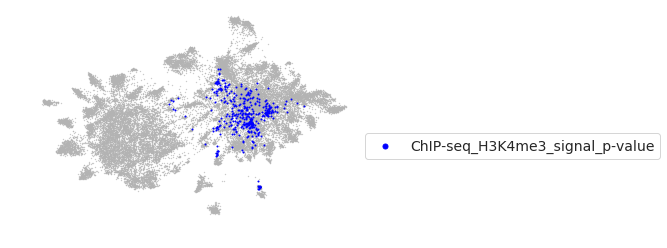

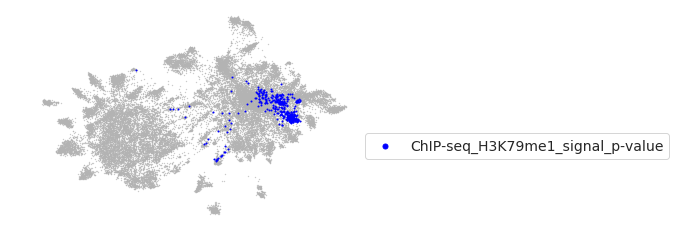

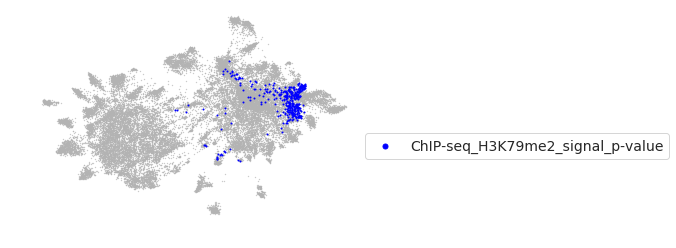

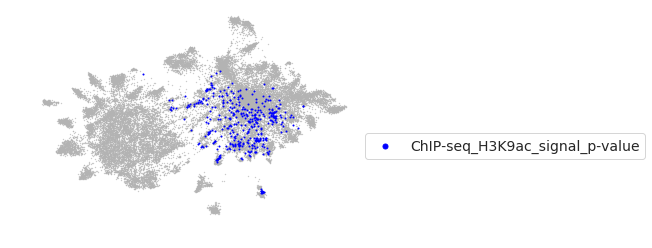

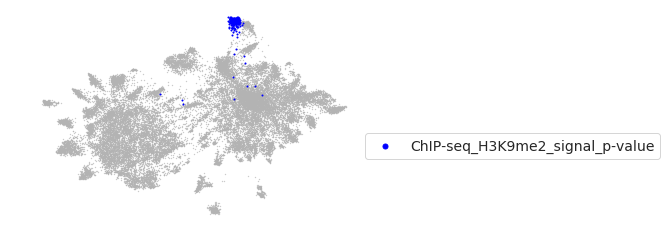

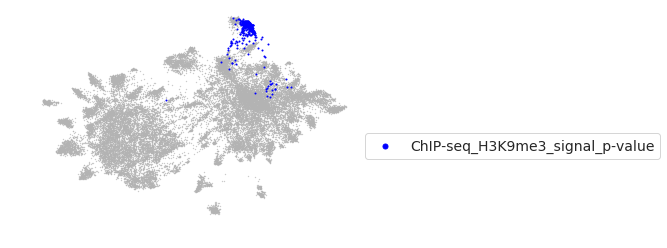

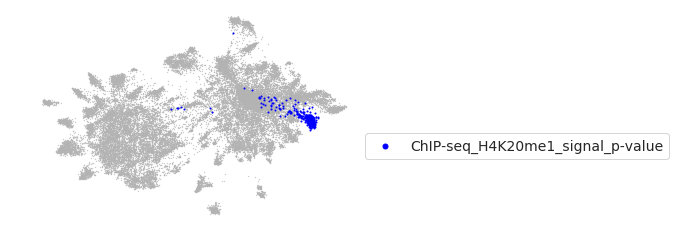

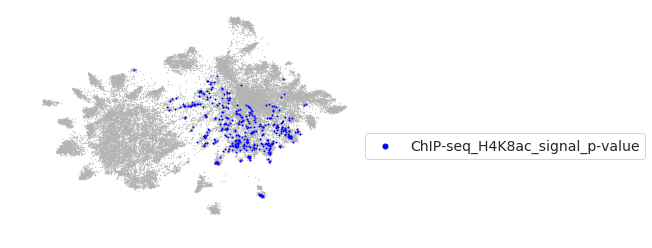

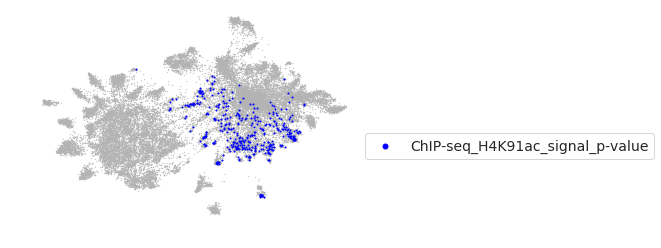

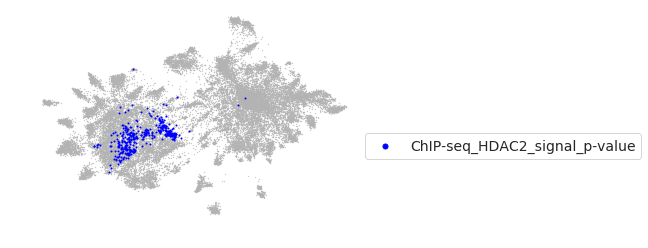

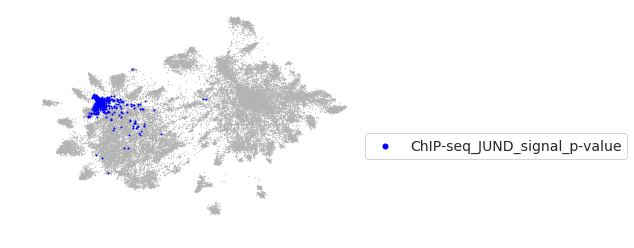

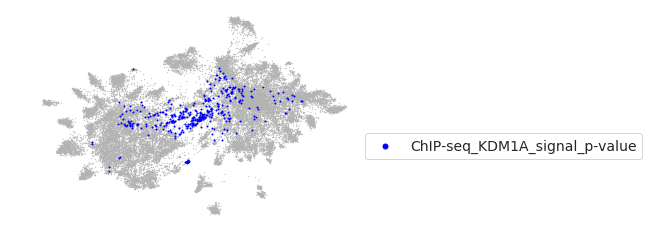

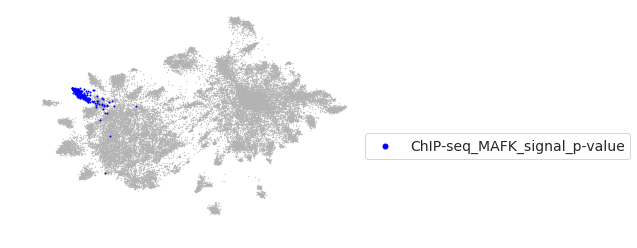

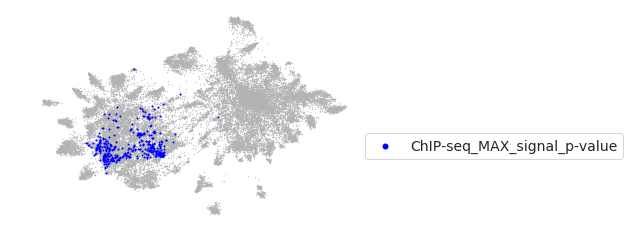

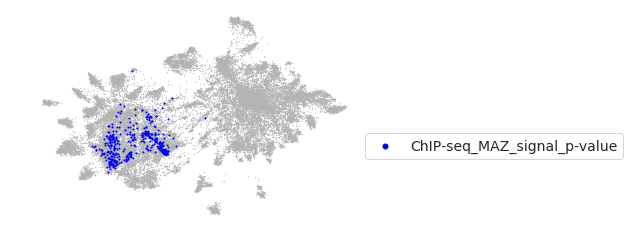

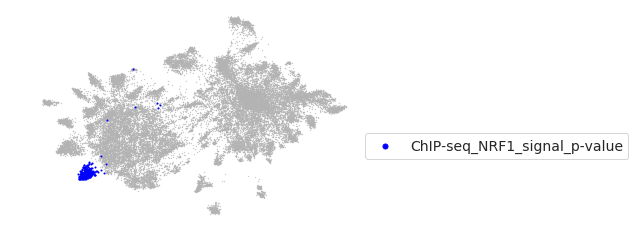

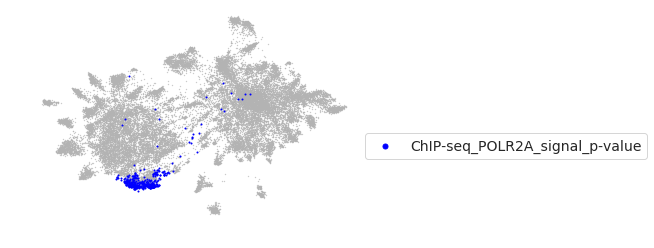

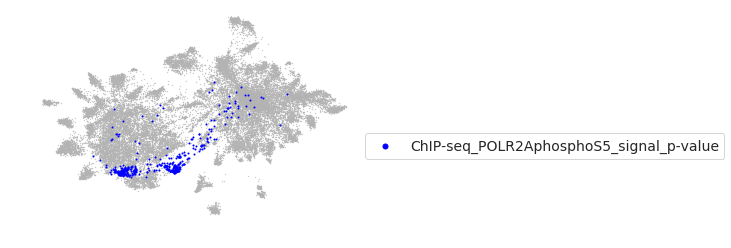

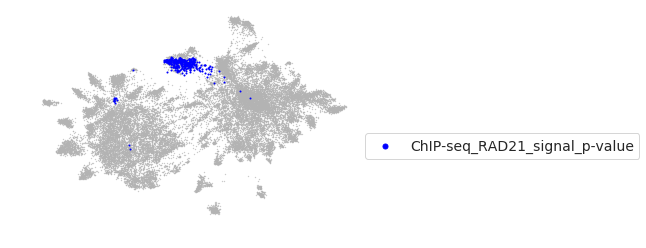

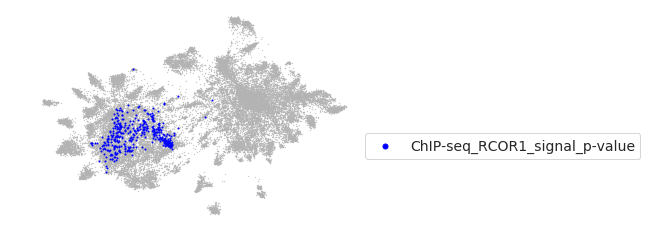

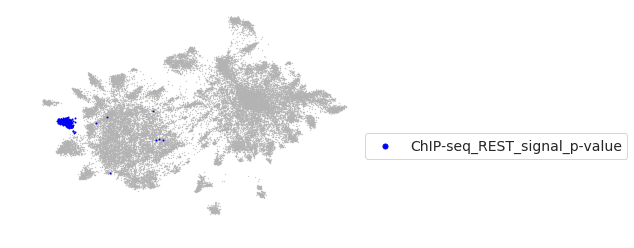

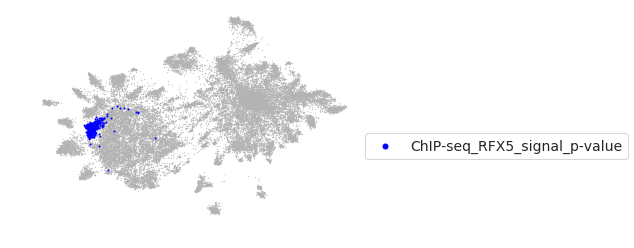

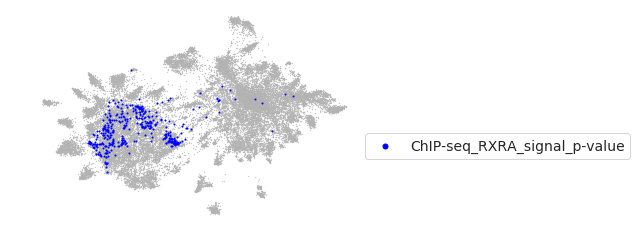

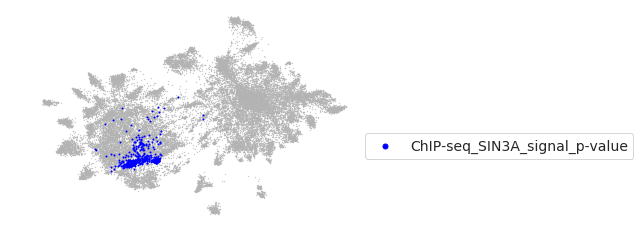

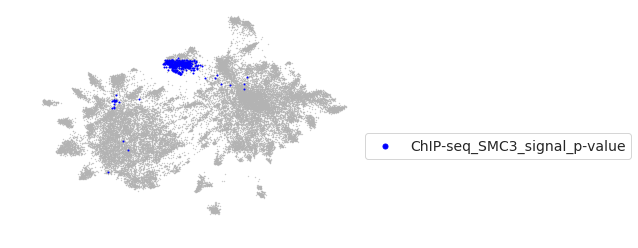

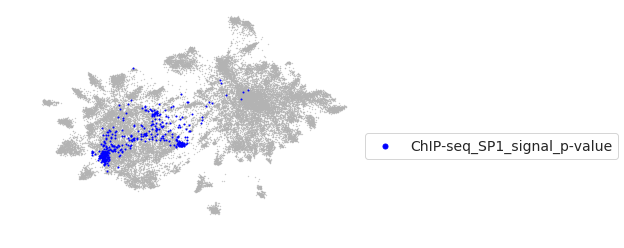

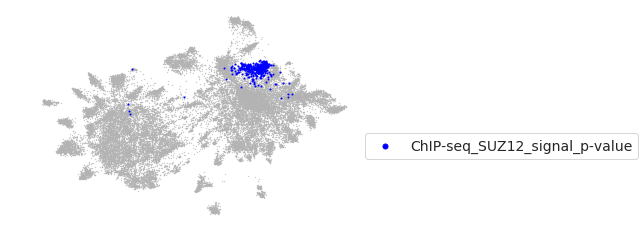

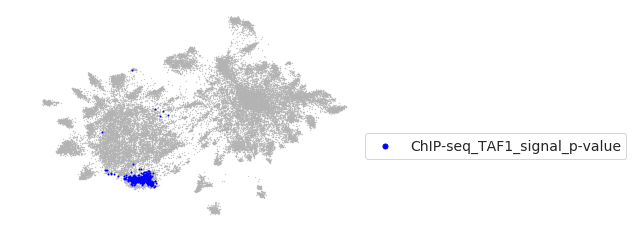

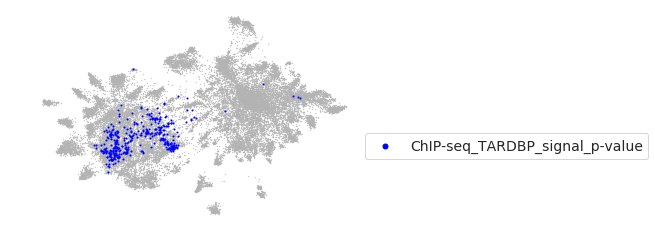

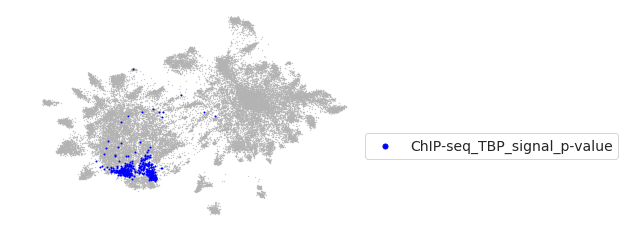

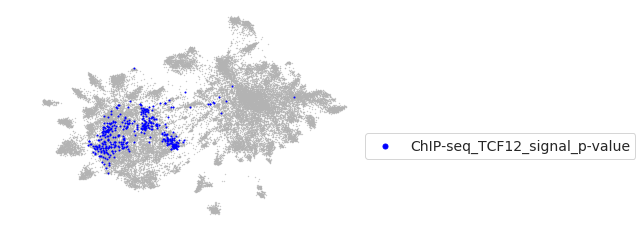

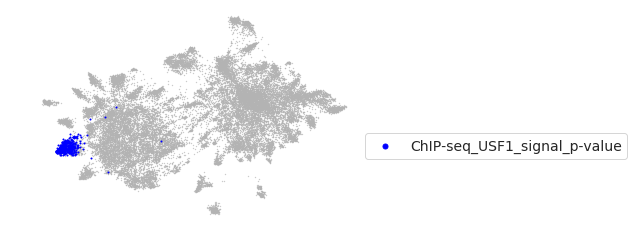

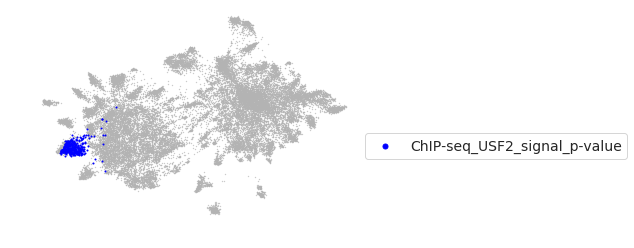

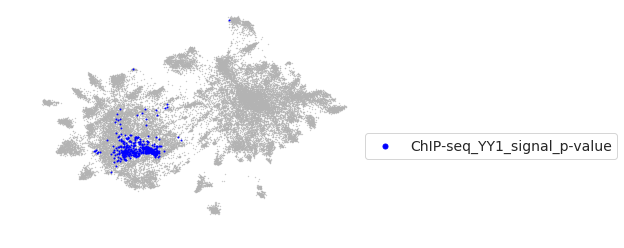

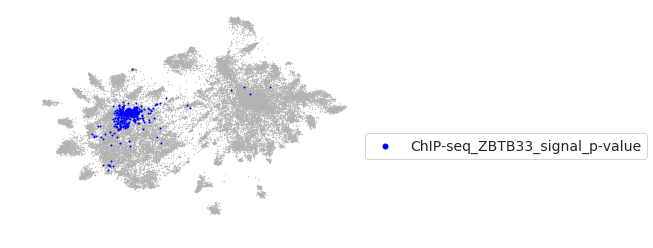

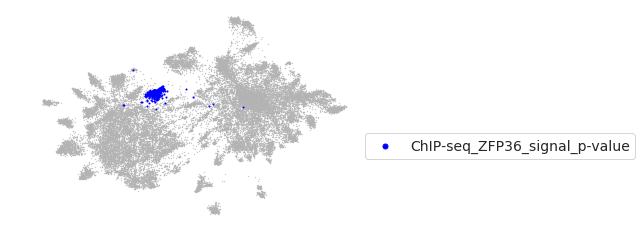

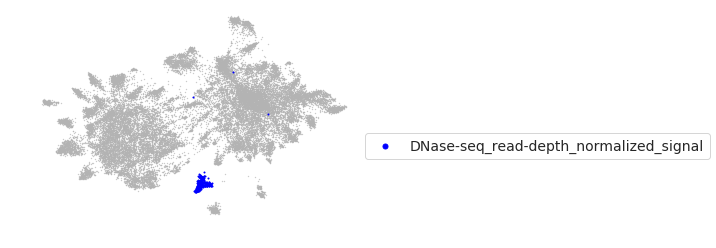

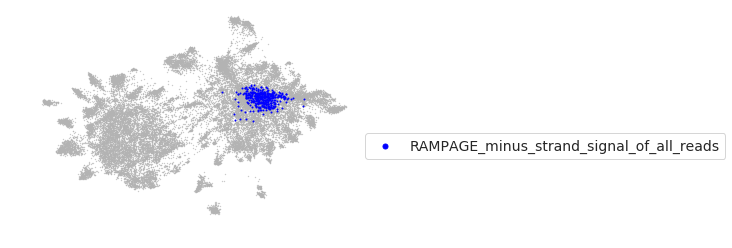

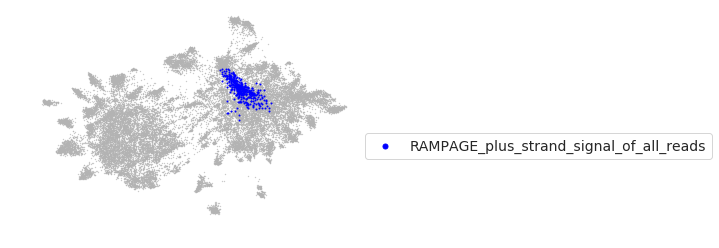

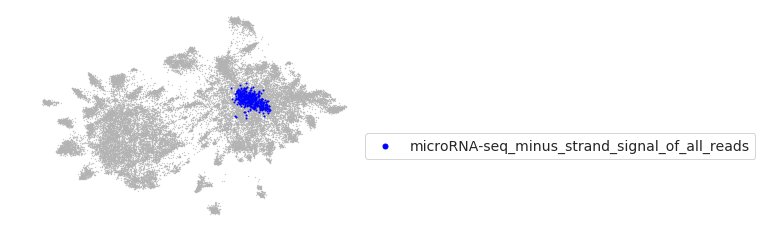

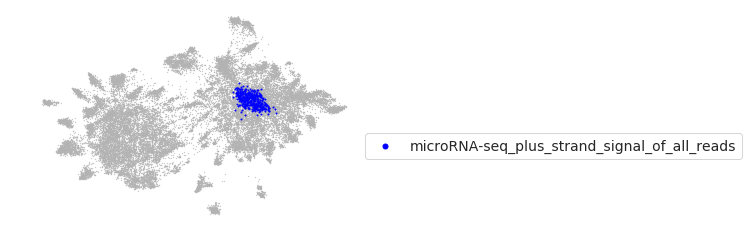

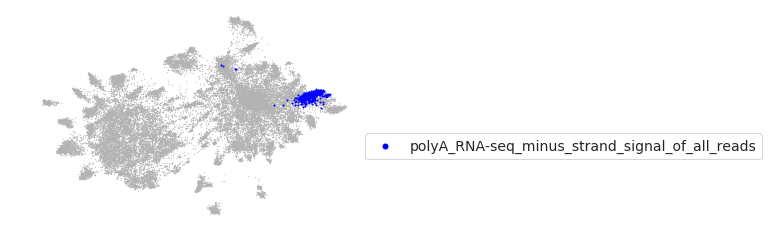

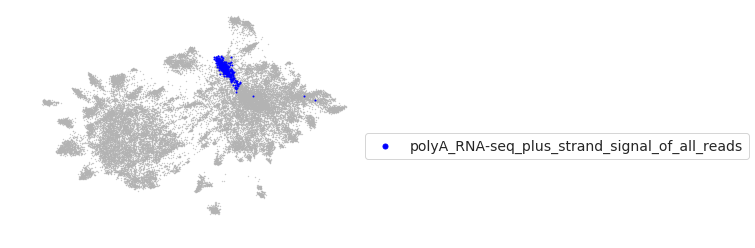

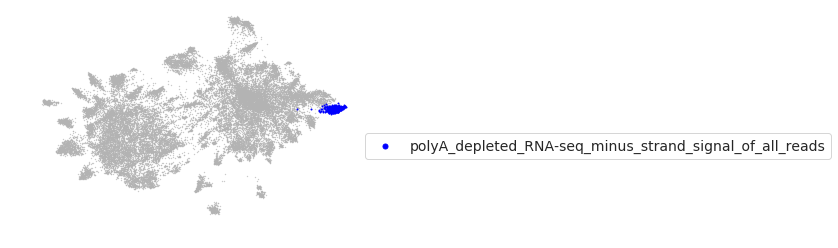

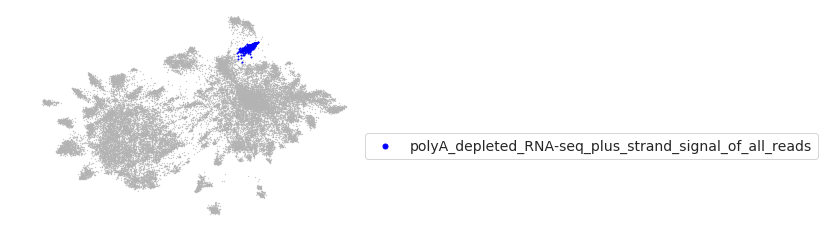

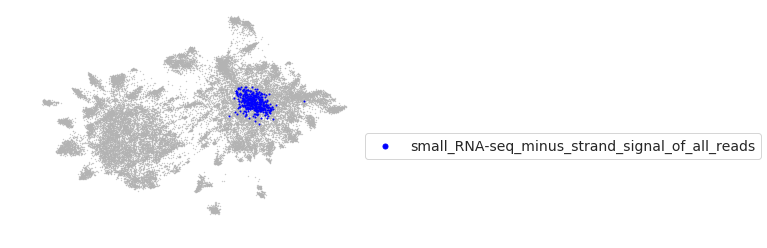

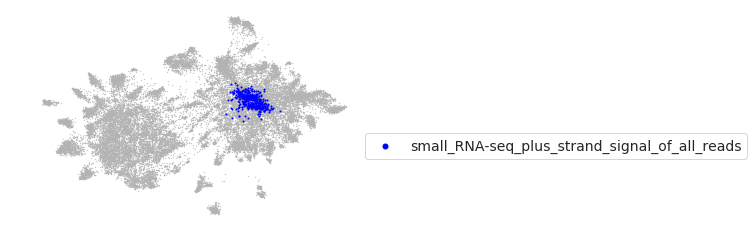

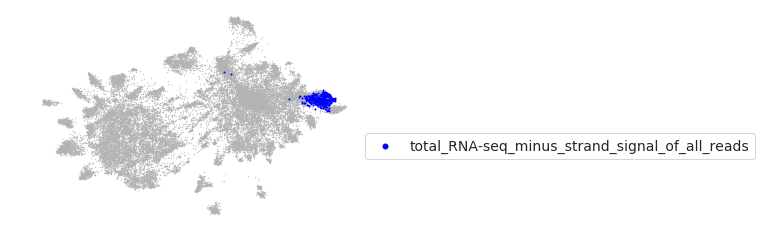

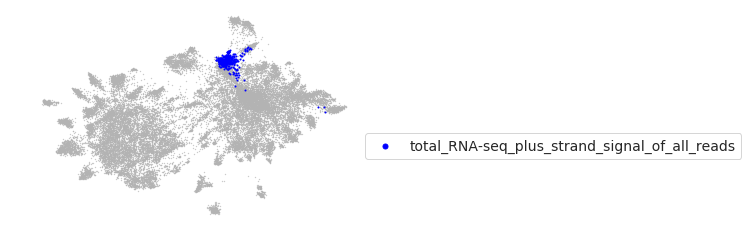

In [11]:
for exp in numpy.unique(experiments[:,1]):
    mask = experiments[:,1] == exp
    plt.figure(facecolor='w')
    plt.scatter(*X_umap.T, s=0.1, color='0.7')
    plt.scatter(*X_umap[mask].T, s=1, label=exp, color='b')
    plt.axis('off')

    plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)
    plt.show()

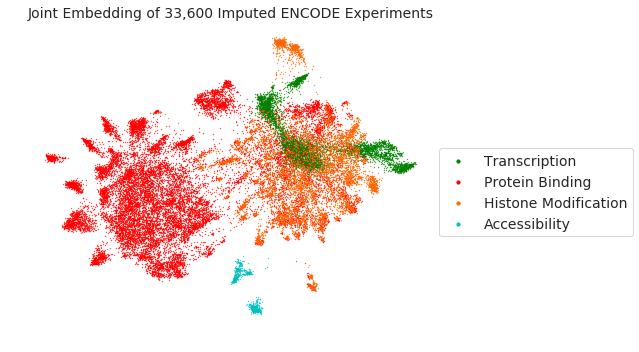

In [12]:
plt.figure(figsize=(9, 5), facecolor='w')
plt.title("Joint Embedding of 33,600 Imputed ENCODE Experiments", fontsize=14)
plt.scatter(*X_umap[rna_mask].T, s=0.1, label='Transcription', color='g')
plt.scatter(*X_umap[tf_mask].T, s=0.1, label='Protein Binding', color='r')
plt.scatter(*X_umap[his_mask].T, s=0.1, label='Histone Modification', color='#FF6600')
plt.scatter(*X_umap[acc_mask].T, s=0.1, label='Accessibility', color='c')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=10)
plt.tight_layout()
plt.axis('off')
plt.show()

In [13]:
model = FacilityLocationSelection(100, verbose=True)
subset = model.fit_transform(X_umap[his_mask])

100%|██████████| 100/100 [00:03<00:00, 26.85it/s]


In [14]:
his_mask.sum()

7200

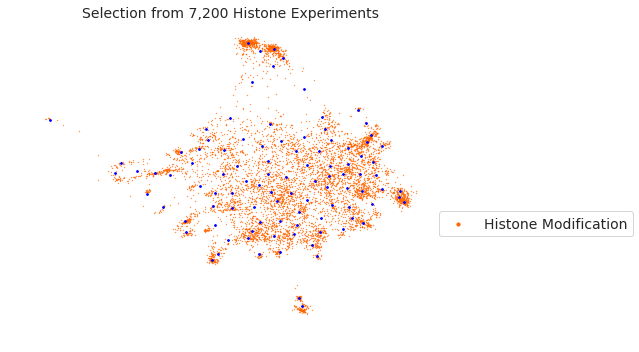

In [15]:
plt.figure(figsize=(9, 5), facecolor='w')
plt.title("Selection from 7,200 Histone Experiments", fontsize=14)
#plt.scatter(*X_umap[rna_mask].T, s=0.1, label='Transcription', color='g')
#plt.scatter(*X_umap[tf_mask].T, s=0.1, label='Protein Binding', color='r')
plt.scatter(*X_umap[his_mask].T, s=0.1, label='Histone Modification', color='#FF6600')
#plt.scatter(*X_umap[acc_mask].T, s=0.1, label='Accessibility', color='c')
plt.scatter(*subset.T, s=3, color='b')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=10)
plt.tight_layout()
plt.axis('off')
plt.show()

In [16]:
(his_mask.sum() ** 2 * 32) / 1024. / 1024. / 1024. 

1.544952392578125

In [17]:
exp_subset = experiments[his_mask][model.ranking]

exps, counts = numpy.unique(exp_subset[:,1], return_counts=True)
exps = numpy.array([exp.replace("ChIP-seq_", "").replace("_signal_p-value", "") for exp in exps])

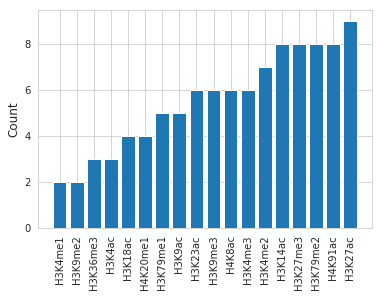

In [18]:
plt.figure(facecolor='w')
plt.bar(range(len(exps)), counts[numpy.argsort(counts)])
plt.xticks(range(len(exps)), exps[numpy.argsort(counts)], rotation=90)
plt.ylabel("Count", fontsize=12)
plt.show()

In [19]:
biosamples = numpy.loadtxt("../../../mango/scripts/Biosample Names.txt", delimiter="\t", dtype=str)
d = {}
for idx, biosample in biosamples:
    d[idx] = biosample

exp_subset_ = numpy.hstack([exp_subset, numpy.array([[d[idx] for idx in exp_subset[:,0]]]).T])
for idx, exp, biosamples in exp_subset_[:10]:
    #if exp != 'ChIP-seq_H3K18ac_signal_p-value':
    #    continue
        
    print(exp.split("_")[1], "\t\t", biosamples)

H3K27ac 		 tibial nerve female adult (53 years)
H3K9me2 		 stomach female embryo (96 days)
H3K14ac 		 duodenal mucosa male adult (76 years)
H3K79me2 		 lung female embryo (120 days)
H4K8ac 		 SJCRH30
H3K9me3 		 iPS-18a female adult (48 years)
H3K9ac 		 middle frontal area 46 female adult (75 years)
H3K27ac 		 LHCN-M2
H3K27ac 		 common myeloid progenitor, CD34-positive female adult (27 years)
H3K9ac 		 HEK293


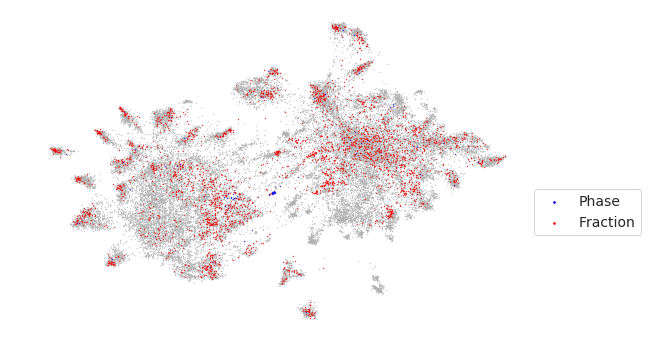

In [20]:
name1, name2, name3 = 'H3K27me3', 'EZH2', 'SUZ12'

mask1 = numpy.array(['phase' in d[ct] for ct in experiments[:,0]])
mask2 = numpy.array(['fraction' in d[ct] for ct in experiments[:,0]])

plt.figure(figsize=(9, 6), facecolor='w')
plt.scatter(*X_umap.T, s=0.1, color='0.7')
plt.scatter(*X_umap[mask1].T, s=0.1, label='Phase', color='b')
plt.scatter(*X_umap[mask2].T, s=0.1, label='Fraction', color='r')
plt.axis('off')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)

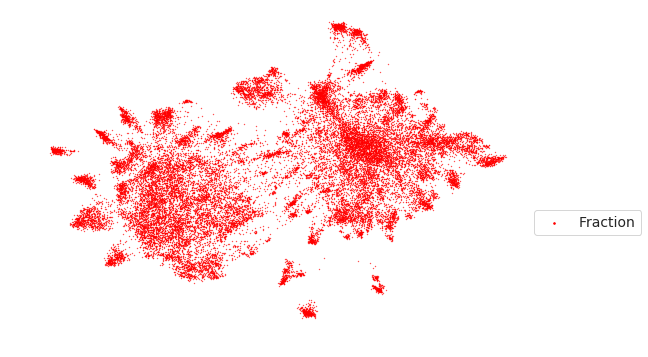

In [21]:
plt.figure(figsize=(9, 6), facecolor='w')
#plt.scatter(*X_umap.T, s=0.1, color='0.7')
#plt.scatter(*X_umap[mask1].T, s=1, label='Phase', color='b')
plt.scatter(*X_umap[~mask2].T, s=0.1, label='Fraction', color='r')
plt.axis('off')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)

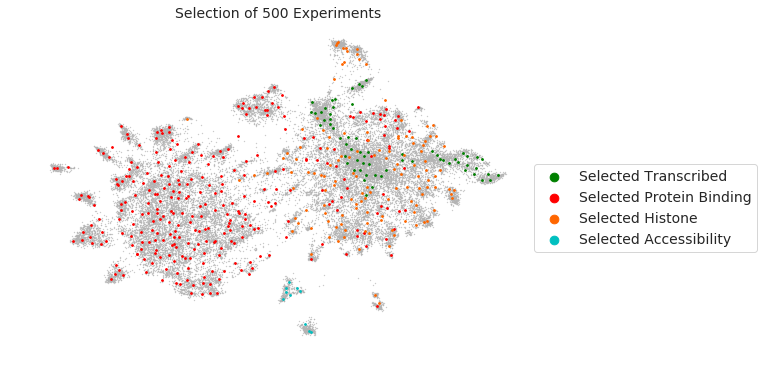

In [22]:
ranking = numpy.load("experiment_ranking_umap.npz")['arr_0'][:500]

mask1 = numpy.intersect1d(ranking, numpy.where(rna_mask == 1)[0])
mask2 = numpy.intersect1d(ranking, numpy.where(tf_mask == 1)[0])
mask3 = numpy.intersect1d(ranking, numpy.where(his_mask == 1)[0])
mask4 = numpy.intersect1d(ranking, numpy.where(acc_mask == 1)[0])

plt.figure(figsize=(9, 6), facecolor='w')
plt.title("Selection of 500 Experiments", fontsize=14)
plt.scatter(*X_umap.T, s=0.1, color='0.7')
plt.scatter(*X_umap[mask1].T, s=3, label='Selected Transcribed', color='g')
plt.scatter(*X_umap[mask2].T, s=3, label='Selected Protein Binding', color='r')
plt.scatter(*X_umap[mask3].T, s=3, label='Selected Histone', color='#FF6600')
plt.scatter(*X_umap[mask4].T, s=3, label='Selected Accessibility', color='c')
plt.axis('off')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)

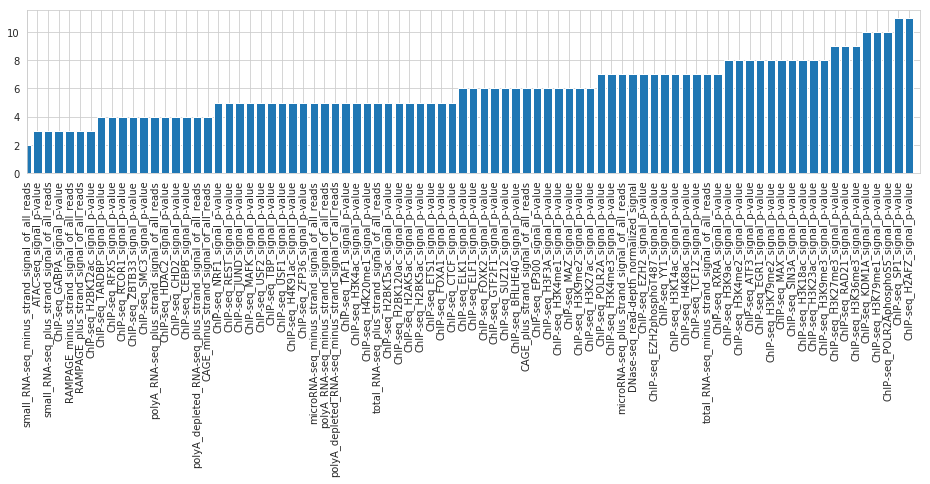

In [23]:
exps, counts = numpy.unique(experiments[ranking[:500], 1], return_counts=True)

plt.figure(figsize=(16, 3), facecolor='w')
plt.bar(range(len(exps)), counts[numpy.argsort(counts)])
plt.xticks(range(len(exps)), exps[numpy.argsort(counts)], rotation=90)
plt.xlim(0, len(exps))
plt.show()

In [24]:
for idx, exp in experiments[ranking[:10]]:
    biosample = d[idx]
    #if exp != 'ChIP-seq_H3K18ac_signal_p-value':
    #    continue
        
    print(exp.split("_")[1], "\t\t", biosample)

KDM1A 		 H4
ETS1 		 kidney male adult (67 years)
H3K27me3 		 HT-29
POLR2AphosphoS5 		 IMR-90
plus 		 mammary epithelial cell female adult (18 years)
JUND 		 A549 cytosolic fraction
H2BK12ac 		 epithelial cell of proximal tubule
H3K36me3 		 esophagus muscularis mucosa female adult (53 years)
MAX 		 prostate gland male adult (54 years)
read-depth 		 psoas muscle male adult (34 years)


In [25]:
performed_experiments = numpy.loadtxt("../../../mango/scripts/ENCODE_Tracks.txt", dtype=str, delimiter="\t")
d2 = {(celltype, assay): True for celltype, assay in performed_experiments}

mask = numpy.array([(celltype, assay) in d2 for (celltype, assay) in experiments], dtype=bool)

preseeded_ranking = numpy.load("experiment_ranking_seeded_umap.npz")['arr_0'][:100]

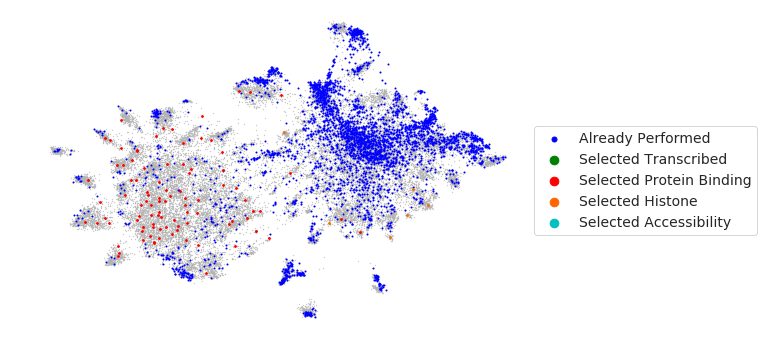

In [26]:
mask1 = numpy.intersect1d(preseeded_ranking, numpy.where(rna_mask == 1)[0])
mask2 = numpy.intersect1d(preseeded_ranking, numpy.where(tf_mask == 1)[0])
mask3 = numpy.intersect1d(preseeded_ranking, numpy.where(his_mask == 1)[0])
mask4 = numpy.intersect1d(preseeded_ranking, numpy.where(acc_mask == 1)[0])

plt.figure(figsize=(9, 6), facecolor='w')
plt.scatter(*X_umap.T, s=0.1, color='0.7')
plt.scatter(*X_umap[mask].T, s=1, label='Already Performed', color='b')
plt.scatter(*X_umap[mask1].T, s=3, label='Selected Transcribed', color='g')
plt.scatter(*X_umap[mask2].T, s=3, label='Selected Protein Binding', color='r')
plt.scatter(*X_umap[mask3].T, s=3, label='Selected Histone', color='#FF6600')
plt.scatter(*X_umap[mask4].T, s=3, label='Selected Accessibility', color='c')
plt.axis('off')

plt.legend(fontsize=14, loc=(1.01, 0.3), markerscale=5)

In [27]:
for idx, exp in experiments[preseeded_ranking[:200]]:
    biosample = d[idx]
    #if exp != 'ChIP-seq_H3K18ac_signal_p-value':
    #    continue
        
    print(exp.split("_")[1], "\t\t", biosample)

TARDBP 		 esophagus squamous epithelium male adult (37 years)
CHD2 		 right atrium auricular region female adult (53 years)
SP1 		 small intestine male embryo (108 days)
TARDBP 		 angular gyrus female adult (75 years)
YY1 		 omental fat pad male adult (37 years)
USF2 		 subcutaneous adipose tissue female adult (51 year)
NRF1 		 suprapubic skin male adult (54 years)
MAX 		 duodenal mucosa male adult (76 years)
MAZ 		 skeletal muscle tissue
SP1 		 aorta female adult (30 years)
MAFK 		 thyroid gland female adult (51 year)
RXRA 		 esophagus muscularis mucosa female adult (51 year)
ETS1 		 suprapubic skin male adult (37 years)
MAX 		 body of pancreas female adult (53 years)
SP1 		 endothelial cell of umbilical vein nuclear fraction male newborn
CEBPB 		 mucosa of rectum female adult (61 year)
JUND 		 duodenal mucosa male adult (76 years)
ELF1 		 stomach male adult (34 years)
RCOR1 		 right atrium auricular region female adult (51 year)
HDAC2 		 mammary epithelial cell female adult (50 years

In [40]:
import pandas

assay_type = []
for assay in experiments[:,1]:
    if 'RNA' in assay or 'CAGE' in assay or 'RAMPAGE' in assay:
        assay_type.append('RNA')
    elif 'ChIP' in assay and assay[9]+assay[11] != 'HK':
        assay_type.append('Transcription Factor')
    elif 'ChIP' in assay and assay[9]+assay[11] == 'HK':
        assay_type.append('Histone Modification')
    elif 'ATAC' in assay or 'DNase' in assay:
        assay_type.append('Accessibility')
        
data = pandas.DataFrame({
    'xcoord': X_umap[:,0], 
    'ycoord': X_umap[:,1], 
    'Biosample': [d[ct] for ct in experiments[:,0]],
    'Biosample Index': experiments[:,0],
    'Assay': experiments[:,1],
    'Assay Type': assay_type
})

In [41]:
data

xcoord    ycoord                            Biosample  \
0      0.042501  1.929892                               KMS-11   
1      2.348036  7.197174                               KMS-11   
2      0.438438  8.049126                               KMS-11   
3     -4.039972  6.534712                               KMS-11   
4     -1.337982  6.962935                               KMS-11   
5     -3.969299  7.669529                               KMS-11   
6     -1.217721  7.018944                               KMS-11   
7     -0.202832  8.658826                               KMS-11   
8     -3.219890  6.164454                               KMS-11   
9     -1.268852  6.985270                               KMS-11   
10    -3.517872  6.350348                               KMS-11   
11    -3.662994  6.811508                               KMS-11   
12    -3.157774  6.015139                               KMS-11   
13     2.123969  6.997118                               KMS-11   
14     2.166557  6.984780                               KMS-11   
15    -3.238562  7.846166                               KMS-11   
16    -1.291511  7.088772                               KMS-11   
17    -5.889325  6.900760                               KMS-11   
18    -2.714829  6.171887                               KMS-11   
19     0.116609  7.752212                               KMS-11   
20    -0.078711  7.996299                               KMS-11   
21    -0.048346  8.006282                               KMS-11   
22     0.087079  7.981717                               KMS-11   
23    -0.101760  7.934368                               KMS-11   
24    -0.136535  7.880203                               KMS-11   
25     0.657365  7.558474                               KMS-11   
26    -0.040729  7.981321                               KMS-11   
27    -0.017062  7.935849                               KMS-11   
28    -0.090860  7.909188                               KMS-11   
29    -0.098800  7.951779                               KMS-11   
...         ...       ...                                  ...   
33570 -2.781830  4.891138  adrenal gland male embryo (97 days)   
33571 -5.209616  5.863706  adrenal gland male embryo (97 days)   
33572 -4.201701  5.429169  adrenal gland male embryo (97 days)   
33573 -2.375126  5.270449  adrenal gland male embryo (97 days)   
33574 -2.640937  4.141973  adrenal gland male embryo (97 days)   
33575 -1.332004  8.569908  adrenal gland male embryo (97 days)   
33576 -3.646997  4.128068  adrenal gland male embryo (97 days)   
33577  1.339448  8.199361  adrenal gland male embryo (97 days)   
33578 -2.525537  3.406489  adrenal gland male embryo (97 days)   
33579 -3.059383  4.934831  adrenal gland male embryo (97 days)   
33580 -2.856744  3.898885  adrenal gland male embryo (97 days)   
33581 -1.524235  6.860248  adrenal gland male embryo (97 days)   
33582 -4.983407  4.759435  adrenal gland male embryo (97 days)   
33583 -4.939658  4.718101  adrenal gland male embryo (97 days)   
33584 -2.459086  4.467612  adrenal gland male embryo (97 days)   
33585 -2.931116  6.056901  adrenal gland male embryo (97 days)   
33586 -1.946798  7.257739  adrenal gland male embryo (97 days)   
33587 -0.512082  2.899956  adrenal gland male embryo (97 days)   
33588  1.754440  6.846505  adrenal gland male embryo (97 days)   
33589  0.855184  7.278841  adrenal gland male embryo (97 days)   
33590  1.271671  6.475970  adrenal gland male embryo (97 days)   
33591  1.611095  6.399329  adrenal gland male embryo (97 days)   
33592  3.096952  6.974897  adrenal gland male embryo (97 days)   
33593  0.248912  8.313268  adrenal gland male embryo (97 days)   
33594  4.231172  6.403030  adrenal gland male embryo (97 days)   
33595  1.270061  9.269533  adrenal gland male embryo (97 days)   
33596  1.487925  6.212318  adrenal gland male embryo (97 days)   
33597  1.387547  6.554634  adrenal gland male embryo (97 days)   
33598  3.284283  6.906845  adrenal gland male emb

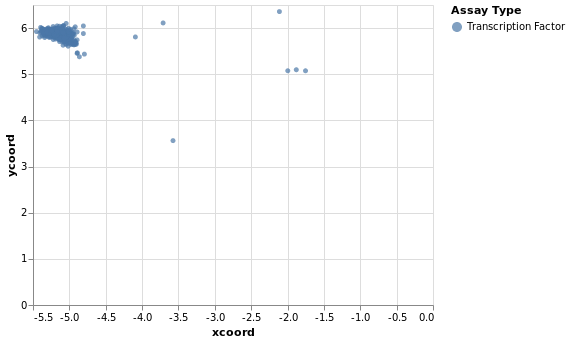

In [51]:
import altair as alt
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')

brush = alt.selection(type='interval')

alt.Chart(data[data['Assay'] == 'ChIP-seq_REST_signal_p-value']).mark_point(size=25, filled=True).encode(
    x='xcoord:Q', 
    y='ycoord:Q',
    color='Assay Type:N',
    tooltip=list(data.columns)
).interactive()